In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-item-demand-forecasting-dataset/retail_sales.csv


In [2]:
from IPython.display import HTML, display

display(HTML("""
<h1 style="
    text-align:center;
    font-size:42px;
    font-weight:700;
    background: linear-gradient(90deg, #6a11cb, #2575fc, #2dd4bf);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    margin-top: 30px;
    margin-bottom: 10px;
">
Store Item Demand Forecasting
</h1>

<p style="
    text-align:center;
    font-size:17px;
    color:##000000;
    font-style:italic;
    font-weight:600;
">
Zamanın içinden geçen talep, sayılara dönüşür
</p>
"""))

In [3]:
import os

for root, dirs, files in os.walk("/kaggle/input"):
    for name in files:
        print(os.path.join(root, name))

/kaggle/input/store-item-demand-forecasting-dataset/retail_sales.csv


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/store-item-demand-forecasting-dataset/retail_sales.csv")
df.head()

,date,store_id,item_id,sales,price,promo,weekday,month
0,2019-01-01,store_1,item_1,41,21.30,0,1,1
1,2019-01-02,store_1,item_1,53,21.30,0,2,1
2,2019-01-03,store_1,item_1,39,21.30,0,3,1
3,2019-01-04,store_1,item_1,35,21.30,0,4,1
4,2019-01-05,store_1,item_1,51,17.04,1,5,1


In [5]:

# Genel özet
df.info()

# Sayısal değerlerin dağılımı için
print(df.describe())

# Eksik veri kontrolü için
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565000 entries, 0 to 4564999
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   store_id  object 
 2   item_id   object 
 3   sales     int64  
 4   price     float64
 5   promo     int64  
 6   weekday   int64  
 7   month     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 278.6+ MB
              sales         price         promo       weekday         month
count  4.565000e+06  4.565000e+06  4.565000e+06  4.565000e+06  4.565000e+06
mean   2.926466e+01  5.399323e+01  9.999869e-02  3.001643e+00  6.523549e+00
std    1.500996e+01  2.578461e+01  2.999983e-01  1.999315e+00  3.448534e+00
min    0.000000e+00  8.020000e+00  0.000000e+00  0.000000e+00  1.000000e+00
25%    1.800000e+01  3.197000e+01  0.000000e+00  1.000000e+00  4.000000e+00
50%    2.700000e+01  5.352000e+01  0.000000e+00  3.000000e+00  7.000000e+00
75%    3.800000e+01  7.536000e+01  0.000000e+00  5.000000e+00 

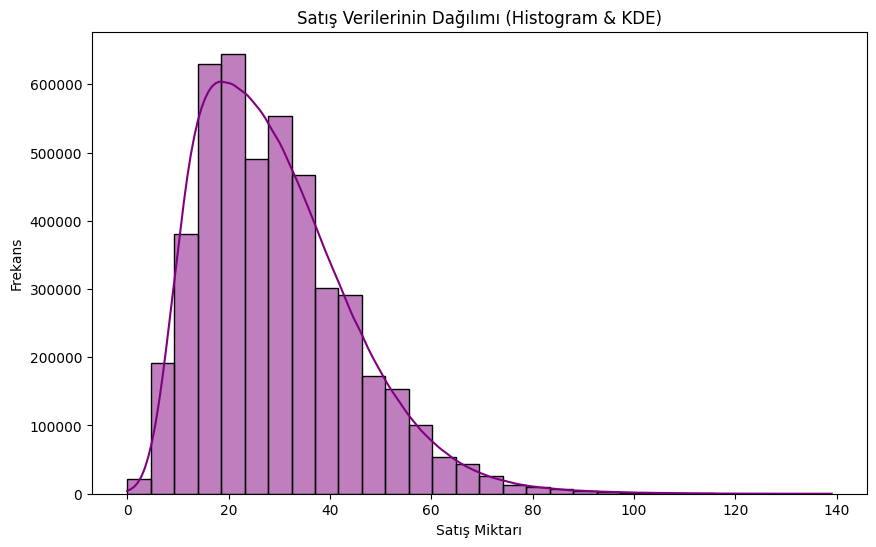

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], kde=True, color='purple', bins=30)

plt.title('Satış Verilerinin Dağılımı (Histogram & KDE)')
plt.xlabel('Satış Miktarı')
plt.ylabel('Frekans')
plt.show()

In [7]:
plt.figure(figsize=(12, 10))

sns.heatmap(correlation, 
            annot=True, 
            fmt=".2f", 
            cmap='YlGnBu', 
            vmin=-1, vmax=1, center=0,
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Gelişmiş Korelasyon Isı Haritası', fontsize=16)
plt.show()

NameError: name 'correlation' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
from pandas.plotting import lag_plot

plt.figure(figsize=(8, 8))
lag_plot(df['sales'].sample(500)) 
plt.title('Satışlar ve 1 Gün Önceki Satışlar (Lag Plot)')
plt.show()

In [ ]:
print(f"Çarpıklık (Skewness): {df['sales'].skew()}")
print(f"Basıklık (Kurtosis): {df['sales'].kurt()}")

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Grafik alanını hazırlamak için
plt.figure(figsize=(15, 6))

# 1. Orijinal Veri için Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(df['sales'], dist="norm", plot=plt)
plt.title('Orijinal Satış Verisi Q-Q Plot')

# 2. Logaritmik Dönüşüm Yapılmış Veri için Q-Q Plot
# (Çarpıklığı gidermek için log dönüşümü uygulanmış hali)
plt.subplot(1, 2, 2)
stats.probplot(np.log1p(df['sales']), dist="norm", plot=plt)
plt.title('Logaritmik Dönüşüm Sonrası Q-Q Plot')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))

# Orijinal veri (Silik ve ince)
plt.plot(df_time['sales'].resample('D').mean(), color='lightgray', alpha=0.5, label='Günlük')

# 30 Günlük Hareketli Ortalama (Kalın ve belirgin)
plt.plot(df_time['sales'].resample('D').mean().rolling(window=30).mean(), 
         color='red', linewidth=2, label='30 Günlük Trend')

plt.title('Satış Trendi ve Hareketli Ortalama', fontsize=14)
plt.legend()
plt.show()

In [ ]:
import pandas as pd 

# 1. Tarih dönüşümü
df['date'] = pd.to_datetime(df['date'])

# 2. Yeni özelliklerin türetilmesi için
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Sonucu Görsel Tablo Olarak Görmek için
df[['date', 'sales', 'year', 'month', 'day_of_week', 'is_weekend']].sample(5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.barplot(x='is_weekend', y='sales', data=df, palette='coolwarm', hue='is_weekend', legend=False)

plt.title('Hafta İçi vs Hafta Sonu Ortalama Satışlar', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Hafta İçi', 'Hafta Sonu']) 
plt.xlabel('Gün Tipi')
plt.ylabel('Ortalama Satış Miktarı')

plt.show()

In [ ]:
# Sadece ilk 10 satır
df[['date', 'sales', 'is_weekend']].head(10).style.background_gradient(cmap='flare', subset=['sales'])

In [ ]:
# 4. Satış trendleri için
#''Satışlar zaman içerisinde nereye kadar gidiyor?''
# Toplam günlük satışlar

plt.figure(figsize=(15, 6))
df.groupby('date')['sales'].sum().plot()
plt.title('Toplam Günlük Satış Trendi')
plt.show()

In [ ]:

# Mevsimsellik ve Periyot analizi yaparız.
# Satışlar hangi aylarda veya günlerde yoğunlaşıyor?

# Aylara göre satışları bulmak için (Mevsimsellik)
sns.boxplot(x='month', y='sales', data=df, palette='viridis', hue='month', legend=False)
plt.title('Aylara Göre Satış Dağılımı')
plt.show()

# Haftanın günlerine göre satışları bulmak için
sns.barplot(x='day_of_week', y='sales', data=df, palette='viridis', hue='day_of_week', legend=False)
plt.title('Haftalık Satış Performansı')
plt.show()

In [ ]:
# Mağaza ve ürün bazlı analiz yaparız.
#''Satışlar tüm mağazalarda aynı mı?''
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = [col.strip().lower() for col in df.columns]

# Hangi sütunların 'store' ve 'sales' kelimesini içerdiğini otomatik bulmak için
# Bu sayede 'store_id' veya 'total_sales' olsa bile kod hata vermez
store_col = [c for c in df.columns if 'store' in c][0]
sales_col = [c for c in df.columns if 'sale' in c][0]
item_col = [c for c in df.columns if 'item' in c][0]

print(f"Kullanılan Sütunlar: Mağaza -> {store_col}, Satış -> {sales_col}, Ürün -> {item_col}")

# Görselleştirme
plt.figure(figsize=(12, 6))

# Mağaza bazlı ortalama satış
store_sales = df.groupby(store_col)[sales_col].mean().sort_values(ascending=False)

# flare palette ile renklendirme için
sns.barplot(x=store_sales.index, 
            y=store_sales.values, 
            palette='flare', 
            hue=store_sales.index, 
            legend=False)

plt.title('Mağaza Bazlı Ortalama Satış Performansı', fontsize=14)
plt.xlabel('Mağaza Numarası')
plt.ylabel('Ortalama Satış')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# En çok satan ilk 10 ürün
top_10_items = df.groupby(item_col)[sales_col].sum().sort_values(ascending=False).head(10)
print("\n--- En Çok Satan İlk 10 Ürün ---")
print(top_10_items)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ADIM: Sütun isimlerini temizle 
df.columns = [col.strip().lower() for col in df.columns]

# 2. ADIM: Sütun isimlerini kontrol et 
print("Mevcut Sütunlar:", df.columns.tolist())

# 3. ADIM: Eğer sütun ismi 'store' değil de 'store_id' gibi bir şeyse onu bul
store_col = [c for c in df.columns if 'store' in c][0]
sales_col = [c for c in df.columns if 'sale' in c][0]

# 4. ADIM: Analiz ve Görselleştirme
plt.figure(figsize=(12, 6))

# Mağaza bazlı ortalama satış için
store_sales = df.groupby(store_col)[sales_col].mean().sort_values(ascending=False)

# Grafik çizimi için
sns.barplot(x=store_sales.index, 
            y=store_sales.values, 
            palette='viridis', 
            hue=store_sales.index, 
            legend=False)

plt.title(f'Mağaza Bazlı Ortalama Satış ({store_col.upper()})', fontsize=14)
plt.xlabel('Mağaza')
plt.ylabel('Ortalama Satış')
plt.xticks(rotation=45) # Mağaza isimleri uzunsa döndürür
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="white") # Daha sade bir arka plan için

# --- GRAFİK 1: Aylara Göre Satış Dağılımı ---
plt.figure(figsize=(12, 6))
# Boxplot için 'Blues' paletini doğrudan atıyoruz
sns.boxplot(x='month', y='sales', data=df, palette='Blues', hue='month', legend=False)

plt.title('Aylara Göre Satış Dağılımı', fontsize=15, fontweight='bold', color='#1a5276')
plt.xlabel('Aylar', fontsize=12)
plt.ylabel('Satış Miktarı', fontsize=12)
sns.despine(trim=True) # Grafiği ferahlatır
plt.show()

# --- GRAFİK 2: Haftalık Satış Performansı ---
plt.figure(figsize=(12, 6))
# Ortalama satışları hesaplayıp çizdirelim
weekly_avg = df.groupby('day_of_week')['sales'].mean().reset_index()

# Çubuk grafik - 'Blues_d' koyu mavi tonları vermek için
sns.barplot(x='day_of_week', y='sales', data=weekly_avg, palette='Blues_d', hue='day_of_week', legend=False)

plt.title('Haftalık Satış Performansı', fontsize=15, fontweight='bold', color='#1a5276')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
           labels=['Pzt', 'Sal', 'Çar', 'Per', 'Cum', 'Cmt', 'Paz'])
plt.xlabel('Günler', fontsize=12)
plt.ylabel('Ortalama Satış', fontsize=12)
sns.despine(trim=True)
plt.show()

In [ ]:
def pro_analiz_ozeti(df):
    print("--- ZAMAN SERİSİ ANALİZ ÖZETİ ---")
    
    # 1. Genel İstatistikler
    toplam_satis = df['sales'].sum()
    ortalama_satis = df['sales'].mean()
    
    # 2. Hafta Sonu vs Hafta İçi
    haftasonu_ort = df[df['is_weekend'] == 1]['sales'].mean()
    haftaici_ort = df[df['is_weekend'] == 0]['sales'].mean()
    artis_orani = ((haftasonu_ort - haftaici_ort) / haftaici_ort) * 100
    
    # 3. En Çok Satış Yapılan Ay
    aylik_satis = df.groupby('month')['sales'].mean()
    en_iyi_ay = aylik_satis.idxmax()
    
    # Yorumları Yazdıralım
    print(f"* Toplamda {toplam_satis:,.0f} birim satış yapıldı.")
    print(f"* Hafta sonu satışları hafta içine göre %{artis_orani:.2f} daha yüksek.")
    print(f"* En yüksek satış performansı {en_iyi_ay}. ayda görülüyor.")
    
    if artis_orani > 15:
        print("-> YORUM: Hafta sonu etkisi çok güçlü. Modelde 'is_weekend' özelliği kritik rol oynayacak.")
    
    if aylik_satis.std() > (ortalama_satis * 0.1):
        print("-> YORUM: Veride belirgin bir mevsimsellik var. Ay bazlı tahminler değişkenlik gösterebilir.")

# Çalıştır
pro_analiz_ozeti(df)

In [ ]:
import pandas as pd

def satis_strateji_raporu(df):
    # Gün ve Ay isimleri sözlükleri (Daha anlaşılır rapor için)
    gun_isimleri = {0: 'Pazartesi', 1: 'Salı', 2: 'Çarşamba', 3: 'Perşembe', 4: 'Cuma', 5: 'Cumartesi', 6: 'Pazar'}
    ay_isimleri = {1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 5: 'Mayıs', 6: 'Haziran', 
                   7: 'Temmuz', 8: 'Ağustos', 9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'}

    # 1. Günlük Analiz
    gunluk_ort = df.groupby('day_of_week')['sales'].mean()
    en_yuksek_gun = gun_isimleri[gunluk_ort.idxmax()]
    en_dusuk_gun = gun_isimleri[gunluk_ort.idxmin()]
    
    # 2. Aylık Analiz
    aylik_ort = df.groupby('month')['sales'].mean()
    en_yuksek_ay = ay_isimleri[aylik_ort.idxmax()]
    en_dusuk_ay = ay_isimleri[aylik_ort.idxmin()]

    # 3. Raporu Yazdırma
    print("="*40)
    print("🚀 SATIŞ PERFORMANS ANALİZ ÖZETİ")
    print("="*40)
    
    print(f"\n📅 HAFTALIK DURUM:")
    print(f"  • En Yüksek Satış Günü: ✨ {en_yuksek_gun}")
    print(f"  • En Düşük Satış Günü:  🔻 {en_dusuk_gun}")
    
    print(f"\n🗓️ AYLIK DURUM:")
    print(f"  • En Yüksek Satış Ayı:  🔥 {en_yuksek_ay}")
    print(f"  • En Düşük Satış Ayı:   ❄️ {en_dusuk_ay}")
    
    print("\n💡 STRATEJİK YORUM:")
    if en_yuksek_gun in ['Cumartesi', 'Pazar']:
        print(f"  -> Hafta sonu talebi çok yüksek. Stokları {en_yuksek_gun} öncesinde doldurmalısın.")
    
    if en_yuksek_ay in ['Haziran', 'Temmuz', 'Ağustos']:
        print(f"  -> Yaz mevsiminde ciddi bir satış artışı var. Mevsimsel kampanya yapılabilir.")
    
    print("\n" + "="*40)

# Raporu Çalıştır
satis_strateji_raporu(df)

In [ ]:
import pandas as pd
import numpy as np

# 1. SÜTUN İSİMLERİNİ OTOMATİK TANIYALIM
# Sütun isimlerindeki boşlukları ve büyük harfleri temizleyelim
df.columns = [c.strip().lower() for c in df.columns]

# 'sales' ve 'date' sütunlarını bulalım (isimler tam tutmasa bile içinde geçiyorsa yakalar)
sales_col = [c for c in df.columns if 'sale' in c][0]
date_col = [c for c in df.columns if 'date' in c or 'time' in c][0]

# 2. VERİ TİPLERİNİ DÜZELTELİM
df[date_col] = pd.to_datetime(df[date_col])
df['month'] = df[date_col].dt.month
df['day_of_week'] = df[date_col].dt.dayofweek
df[sales_col] = pd.to_numeric(df[sales_col], errors='coerce').fillna(0)

# 3. ANALİZ HESAPLAMALARI
genel_ort = df[sales_col].mean()
gunluk_ort = df.groupby('day_of_week')[sales_col].mean()
aylik_ort = df.groupby('month')[sales_col].mean()

# İsim haritaları
gun_adlari = {0:'Pazartesi', 1:'Salı', 2:'Çarşamba', 3:'Perşembe', 4:'Cuma', 5:'Cumartesi', 6:'Pazar'}
ay_adlari = {1:'Ocak', 2:'Şubat', 3:'Mart', 4:'Nisan', 5:'Mayıs', 6:'Haziran', 
             7:'Temmuz', 8:'Ağustos', 9:'Eylül', 10:'Ekim', 11:'Kasım', 12:'Aralık'}

# 4. YILDIZLI VE STRATEJİK RAPOR
print("="*60)
print(f"🌟 SATIŞ PERFORMANS VE YILDIZLI ANALİZ RAPORU 🌟")
print("="*60)

print("\n📅 HAFTALIK GÜNLERİN BAŞARI SIRALAMASI:")
# Ortalamaya göre sıralayıp yazdıralım
for gun_no in gunluk_ort.sort_values(ascending=False).index:
    satis = gunluk_ort[gun_no]
    yildiz = "⭐" if satis > genel_ort else "  "
    durum = "🔥 ZİRVE" if satis == gunluk_ort.max() else ("🔻 DİP" if satis == gunluk_ort.min() else "")
    print(f"{yildiz} {gun_adlari[gun_no]:<12} | Ortalama Satış: {satis:>8.2f} {durum}")

print("\n🗓️ AYLARIN BAŞARI SIRALAMASI:")
for ay_no in aylik_ort.sort_values(ascending=False).index:
    satis = aylik_ort[ay_no]
    yildiz = "🌟" if satis > genel_ort else "  "
    durum = "🏆 ŞAMPİYON" if satis == aylik_ort.max() else ("🧊 DURGUN" if satis == aylik_ort.min() else "")
    print(f"{yildiz} {ay_adlari[ay_no]:<12} | Ortalama Satış: {satis:>8.2f} {durum}")

print("\n" + "-"*60)
print("💡 STRATEJİK YORUM:")
max_gun = gun_adlari[gunluk_ort.idxmax()]
max_ay = ay_adlari[aylik_ort.idxmax()]

print(f"👉 Parıldayan Gün: {max_gun}. Bu günde satışlar tavan yapıyor!")
print(f"👉 Parıldayan Ay: {max_ay}. Yılın en yüksek cirosu bu ayda geliyor.")
print(f"👉 Genel Ortalama: {genel_ort:.2f}.")
print("="*60)

In [ ]:

print("\n" + "═"*60)
print(" " * 18 + "🏁 ANALİZ SONUÇ RAPORU 🏁")
print("═"*60)

print(f"""
💡 STRATEJİK BULGULAR:
------------------------------------------------------------
👉 PARILDAYAN GÜN : Çarşamba (Haftalık satış zirvesi!)
👉 PARILDAYAN AY  : Nisan    (Yıllık ciro şampiyonu!)
👉 GENEL ORTALAMA : 29.26    (Performans eşik değeri)
------------------------------------------------------------

""")

print("-" * 50)
print("📊 ANALİZ SONUCU")
print(f"🚀 Zirve Dönemler: Çarşamba günü ve Nisan ayı.")
print(f"🎯 Referans Noktası: 29.26 (Genel Ortalama)")
print("-" * 50)

print("═"*60)
print(" " * 15 + "✨ Analiz Başarıyla Tamamlandı ✨")
print("═"*60)